# KUSH OZA

# D2-42

# DL-LAB-PROJECT

**IMPORTING THE NECESSARY MODULES NECESSARY FOR PREPROCESSING.**

**SAMPLE DATASET LOOK**

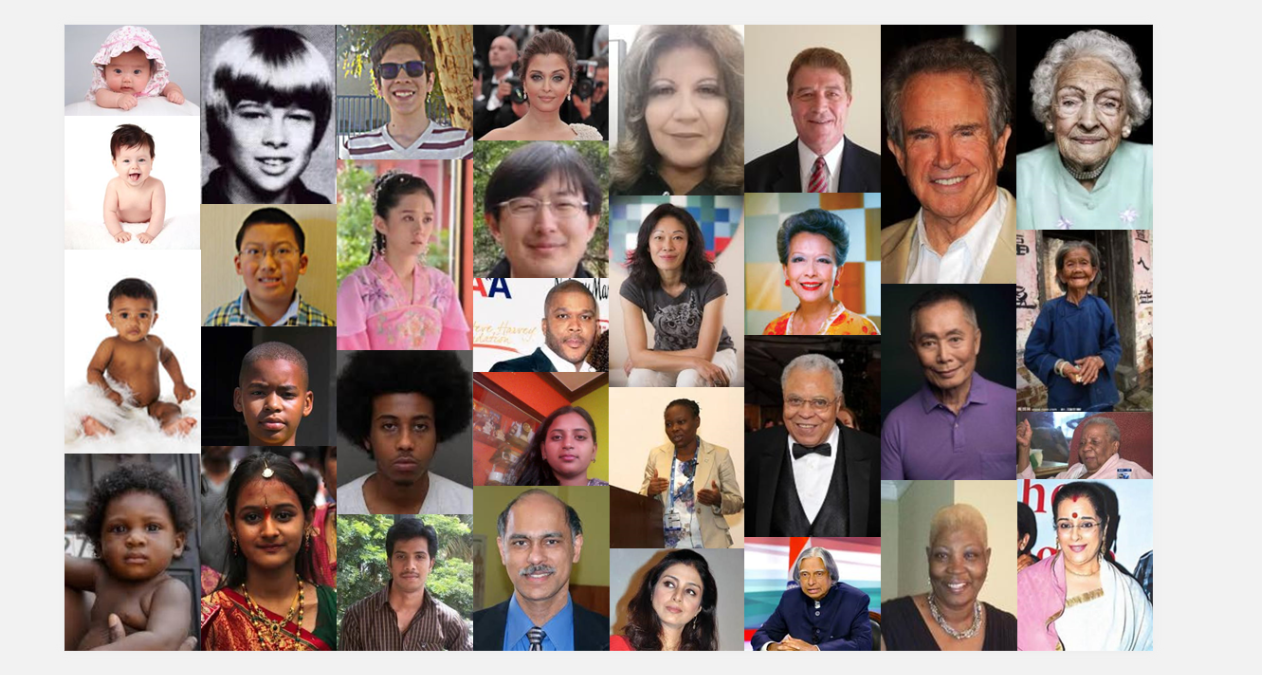

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# LOAD THE DATASET

In [2]:
BASE_DIR='/kaggle/input/utkface-new/UTKFace'

In [3]:
# AGE,GENDER AND ETHINICITY
image_paths=[]
age_labels=[]
gender_labels=[]
for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR,filename)
    temp=filename.split('_')
    age=int(temp[0])
    gender=int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
#convert to dataframe
df=pd.DataFrame()
df['image'],df['age'],df['gender']=image_paths,age_labels,gender_labels

In [5]:
df.head()

image  age  gender
0  /kaggle/input/utkface-new/UTKFace/26_0_2_20170...   26       0
1  /kaggle/input/utkface-new/UTKFace/22_1_1_20170...   22       1
2  /kaggle/input/utkface-new/UTKFace/21_1_3_20170...   21       1
3  /kaggle/input/utkface-new/UTKFace/28_0_0_20170...   28       0
4  /kaggle/input/utkface-new/UTKFace/17_1_4_20170...   17       1

In [6]:
# map labels for gender
gender_dict={0:'Male',1:'Female'}

# Exploratory Data Analysis

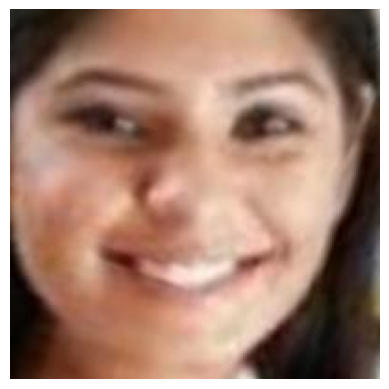

In [7]:
from PIL import Image
img= Image.open(df['image'][2])
plt.axis('off')
plt.imshow(img)

SINCE RESOURCES ARE LIMITED ON KAGGLE, RGB IMAGES CAN BE COMPUTATIONALLY EXPENSIVE AND HENCE WE WILL PERFORM GRAYSCALING OF IMAGES

<Axes: xlabel='age', ylabel='Density'>

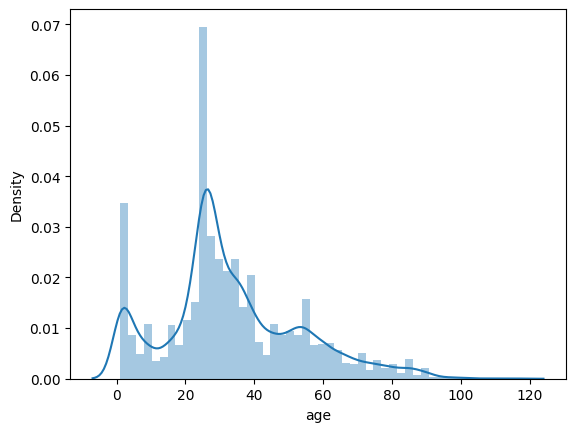

In [8]:
sns.distplot(df['age'])

In [23]:
import plotly.express as px
gender_mapping = ["Male", "Female"]
male_count = 0
ages = []
for path in image_paths:
    path_split = path.split("_")
    if "0" == path_split[1]:
        male_count += 1
female_count = len(image_paths) - male_count
pie_chart = px.pie(
    names = gender_mapping,
    values = [male_count, female_count],
    title = "Gender Distribution Donut Chart",
    height = 500
)
pie_chart.show()

In [28]:
print("Total  Males  Count: ",male_count)
print("Total Females Count: ",female_count)

Total  Males  Count:  12391
Total Females Count:  11317


<Axes: xlabel='gender', ylabel='count'>

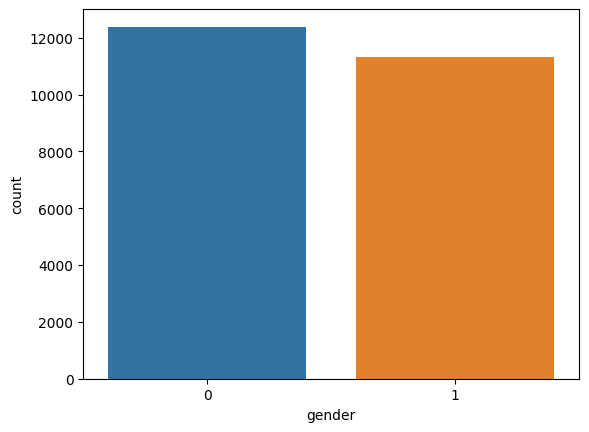

In [9]:
sns.countplot(x='gender', data=df)

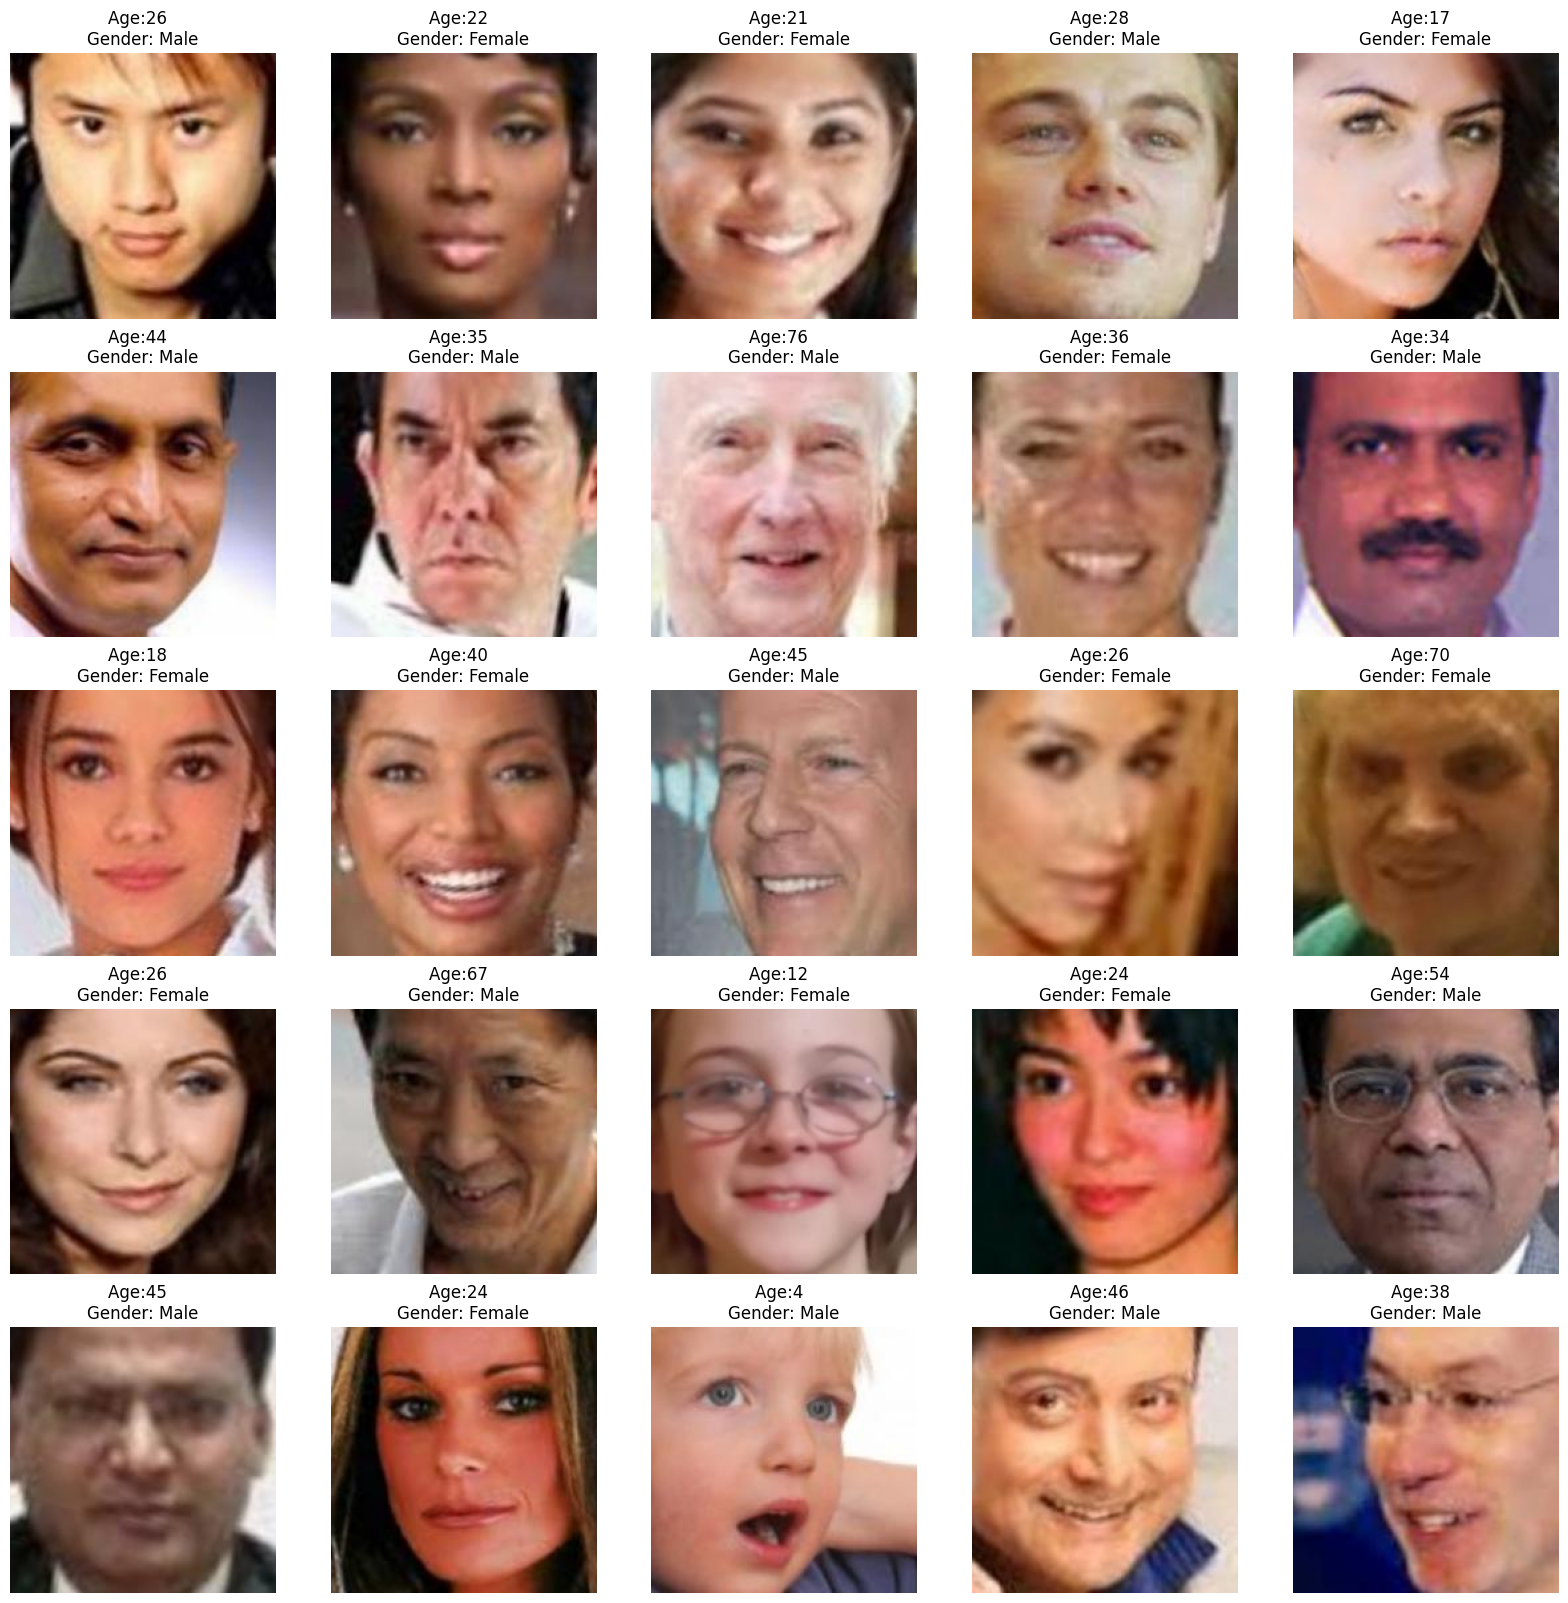

In [15]:
# display grid of images
plt.figure(figsize=(20,20))
files = df.iloc[0:25]

for index,file,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = Image.open(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(f"Age:{age}  \nGender: {gender_dict[gender]}")
    plt.axis('off')

In [31]:
from keras.preprocessing.image import load_img

2024-03-04 15:28:15.935398: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 15:28:15.935507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 15:28:16.079273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Feature Extraction with Preprocessing

In [34]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,color_mode='grayscale')
        img=img.resize((128,128), Image.ANTIALIAS)
        img= np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),128,128,1)
    return features

In [35]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [36]:
X.shape

(23708, 128, 128, 1)

In [37]:
#normalize the image pixel values
X=X/255.0
#helps in speeding up the training process